In [79]:
# groupby, crosstab, pivot
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from fbprophet import Prophet

In [80]:
df = pd.read_csv('AirPassengers.csv')
df.head()

,Month,AirPassengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [81]:
df['Month'] = pd.DatetimeIndex(df['Month'])
df.dtypes

Month            datetime64[ns]
AirPassengers             int64
dtype: object

In [82]:
df = df.rename(columns={'Month':'ds', 'AirPassengers':'y'})
df.head(5)
df.tail(5)

,ds,y
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390
143,1960-12-01,432


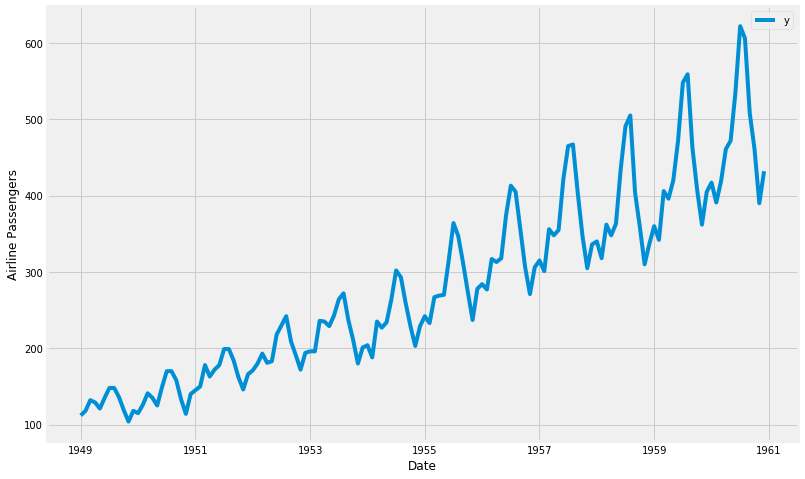

In [83]:
from matplotlib import pyplot as plt
ax = df.set_index('ds').plot(figsize=(12,8))
ax.set_ylabel('Airline Passengers')
ax.set_xlabel('Date')

plt.show()

In [ ]:
my_model = Prophet(interval_width = 0.95)
my_model.fit(df)

In [ ]:
future_dates = my_model.make_future_dataframe(periods = 36, freq='MS')
future_dates.tail()

In [ ]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

In [ ]:
my_model.plot(forecast, uncertainty = True)

In [ ]:
my_model.plot_components(forecast)

In [77]:
import folium
#map_osm = folium.Map(location=[45.5236, -122.6750])
map1 = folium.Map(location = [37.565711, 126.978090], tiles = 'Stamen Terrain', zoom_start=20)
#folium.Marker([37.565711, 126.978090], popup='서울시청').add_to(map1)
folium.Marker([37.565711, 126.978090], popup='서울시청', icon=folium.Icon(icon='cloud')).add_to(map1)

In [78]:
map1

       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


C:\Users\acorn\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


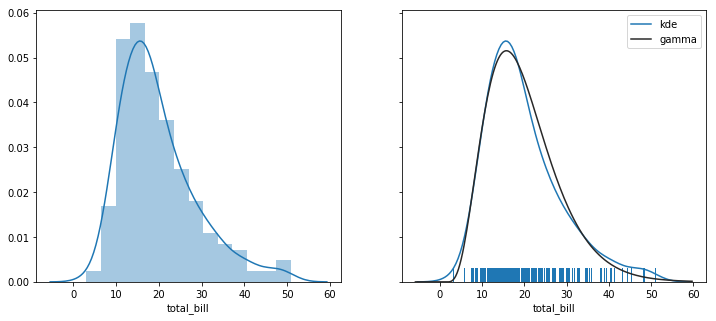

In [14]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

tips = sns.load_dataset('tips')
print(tips.describe())
f, (ax1, ax2) = plt.subplots(1,2,figsize=(12,5), sharey=True)
sns.distplot(tips.total_bill, ax = ax1, hist=True)
sns.distplot(tips.total_bill, ax = ax2, hist=False, kde=True, rug=True, fit= stats.gamma, fit_kws=dict(label='gamma'), kde_kws=dict(label='kde'))
ax2.legend()

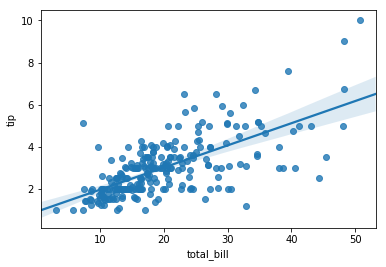

In [15]:
sns.regplot(x='total_bill', y='tip', data=tips)

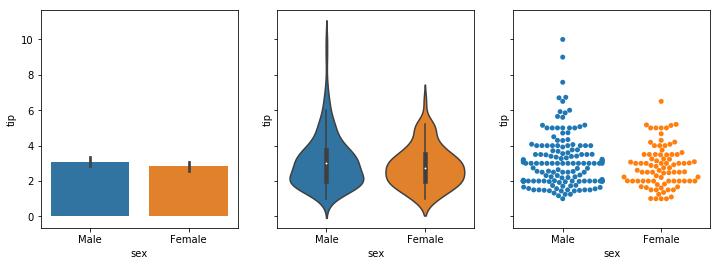

In [17]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4), sharey=True)
sns.barplot(x='sex', y='tip', data=tips, ax = ax1)
sns.violinplot(x='sex', y='tip', data=tips, ax=ax2)
sns.swarmplot(x='sex', y='tip', data=tips, ax=ax3)

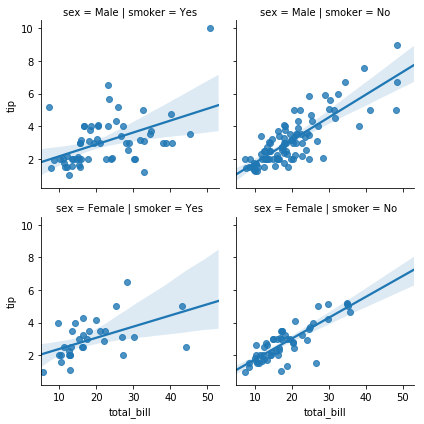

In [18]:
# 범주형 데이터
g = sns.FacetGrid(tips, col='smoker', row='sex')
g.map(sns.regplot, 'total_bill', 'tip')

In [20]:
import pandas as pd
df = pd.read_csv('Pokemon.csv', index_col=0)
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


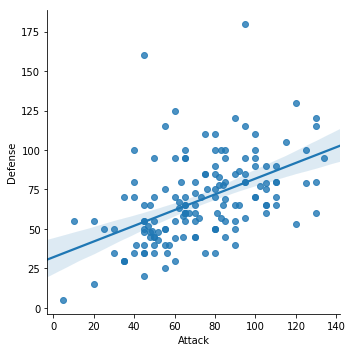

In [21]:
sns.lmplot(x='Attack', y='Defense', data=df)

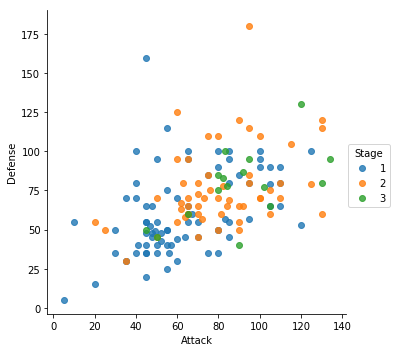

In [22]:
sns.lmplot(x='Attack', y='Defense', data=df, fit_reg=False, hue='Stage')

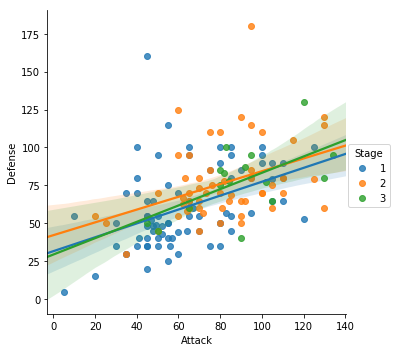

In [23]:
sns.lmplot(x='Attack', y='Defense', data=df, fit_reg=True, hue='Stage')

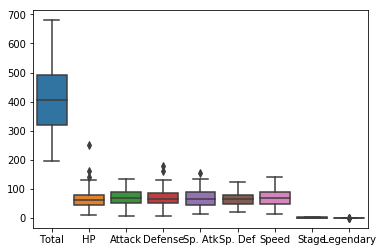

In [24]:
sns.boxplot(data=df)

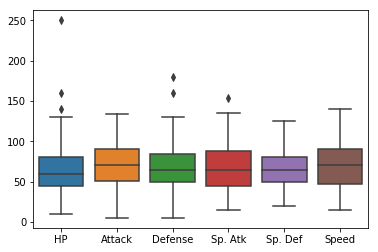

In [26]:
stats_df = df.drop(['Total', 'Stage', 'Legendary'], axis=1)
#print(stats_df)
sns.boxplot(data=stats_df)

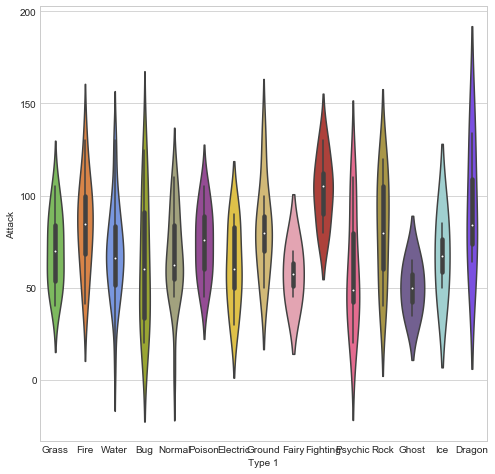

In [35]:
#sns.set_style('whitegrid')
f, (ax1) = plt.subplots(1, 1, figsize=(8,8), sharey=True)
#sns.set_style('ticks', {"xtick.major.size":10, "ytick.major.size":10})
sns.violinplot(x='Type 1', y= 'Attack', data=df, palette=pkmn_type_colors)

In [33]:
pkmn_type_colors = ['#78C850',  
                    '#F08030',  
                    '#6890F0',  
                    '#A8B820',  
                    '#A8A878',  
                    '#A040A0',  
                    '#F8D030',  
                    '#E0C068',  
                    '#EE99AC',  
                    '#C03028',  
                    '#F85888',  
                    '#B8A038',  
                    '#705898',  
                    '#98D8D8',  
                    '#7038F8',  
                   ] 

               HP    Attack   Defense   Sp. Atk   Sp. Def     Speed
HP       1.000000  0.306768  0.119782  0.236649  0.490978 -0.040939
Attack   0.306768  1.000000  0.491965  0.146312  0.369069  0.194701
Defense  0.119782  0.491965  1.000000  0.187569  0.139912 -0.053252
Sp. Atk  0.236649  0.146312  0.187569  1.000000  0.522907  0.411516
Sp. Def  0.490978  0.369069  0.139912  0.522907  1.000000  0.392656
Speed   -0.040939  0.194701 -0.053252  0.411516  0.392656  1.000000


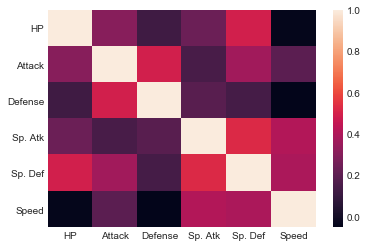

In [36]:
corr = stats_df.corr()
print(corr)
sns.heatmap(corr)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

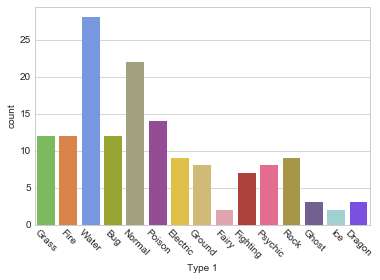

In [39]:
sns.countplot(x='Type 1', data=df, palette=pkmn_type_colors)
plt.xticks(rotation=-45)

C:\Users\acorn\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\acorn\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


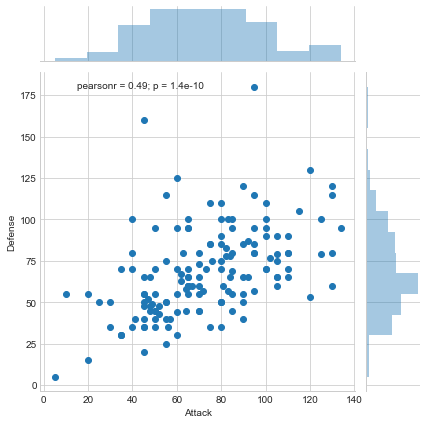

In [40]:
sns.jointplot(x='Attack', y='Defense', data=df)

C:\Users\acorn\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\acorn\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


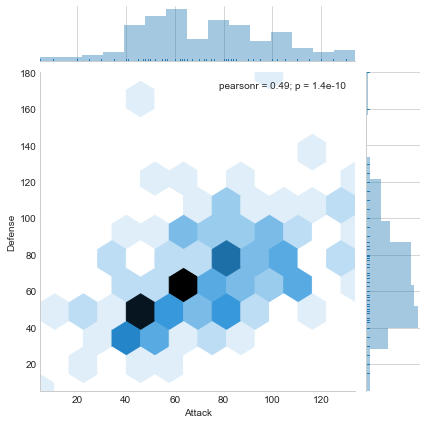

In [43]:
sns.jointplot(x="Attack", y= "Defense",marginal_kws=dict(bins=15, rug=True), kind="hex", data=df)

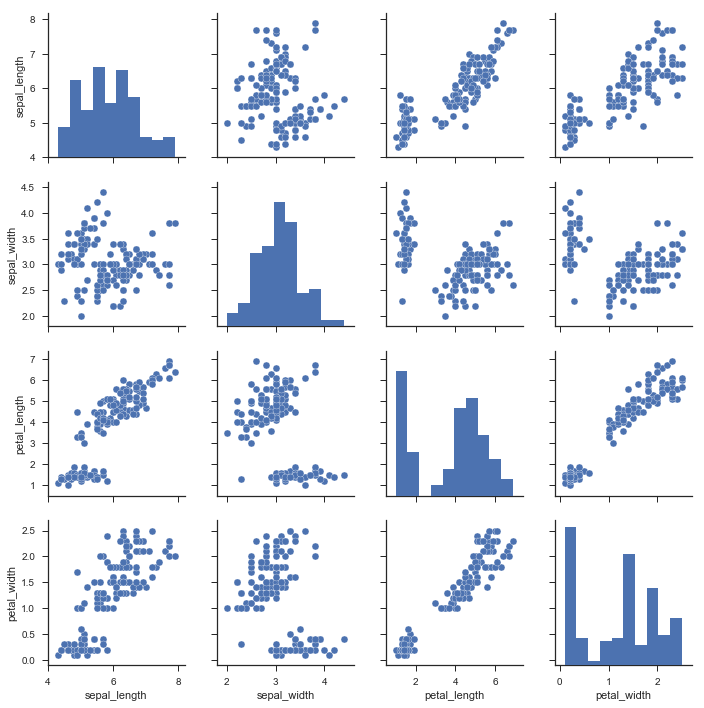

In [45]:
sns.set(style='ticks', color_codes=True)
iris = sns.load_dataset('iris')
g = sns.pairplot(iris)

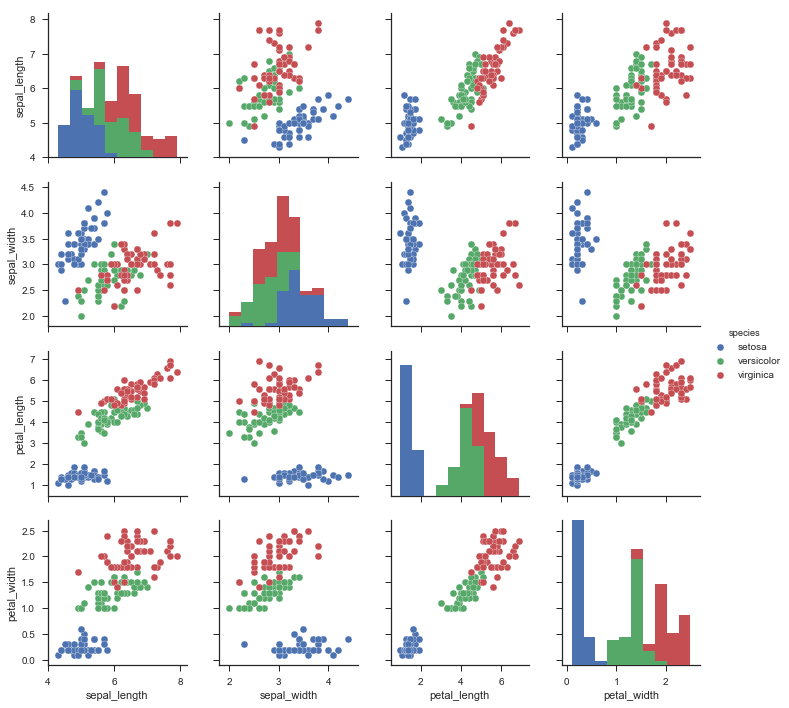

In [46]:
g = sns.pairplot(iris, hue = 'species')

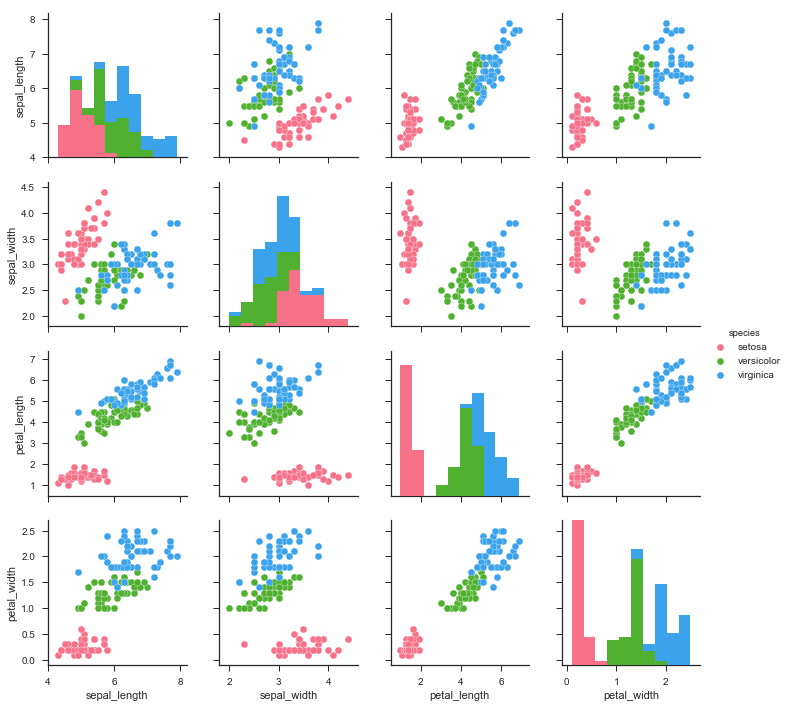

In [49]:
g = sns.pairplot(iris, hue='species' ,palette='husl')

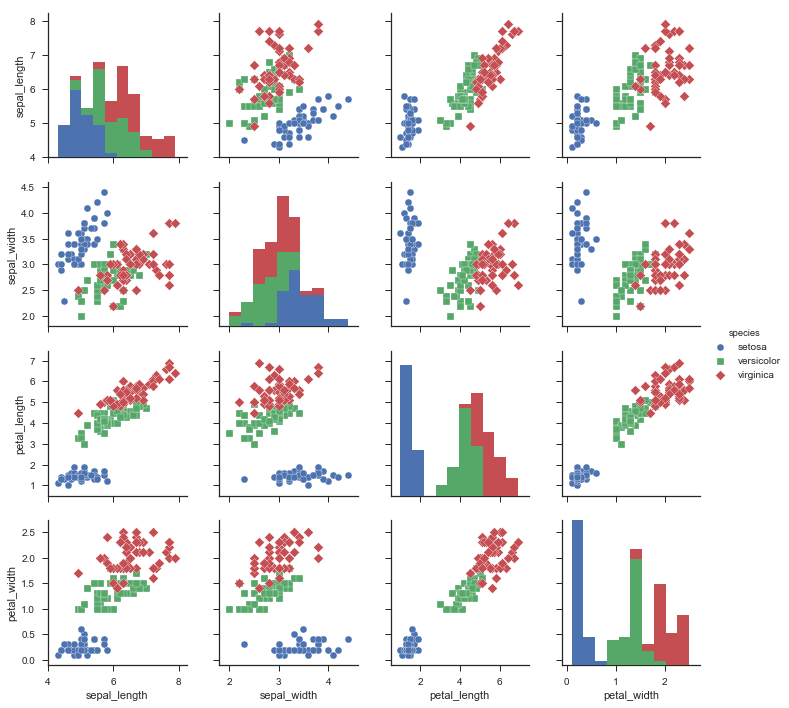

In [50]:
g = sns.pairplot(iris, hue='species', markers=['o','s','D'])

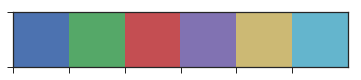

In [52]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

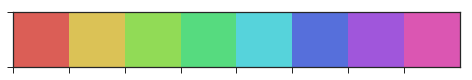

In [53]:
sns.palplot(sns.color_palette('hls', 8))

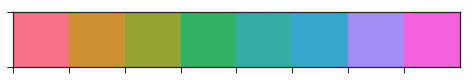

In [54]:
sns.palplot(sns.color_palette('husl', 8))

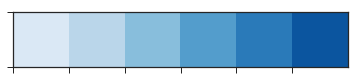

In [57]:
sns.palplot(sns.color_palette('Blues'))

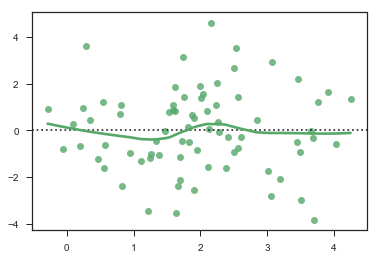

In [58]:
rs = np.random.RandomState(7)
x = rs.normal(2, 1, 75)
y = 2 + 1.5 * x + rs.normal(0, 2, 75)
sns.residplot(x,y,lowess=True, color='g')

In [1]:
import pymongo
from pymongo import MongoClient
client = MongoClient()
client = MongoClient('192.168.0.164', 27017)
db = client.acorn
collection = db.inventory

In [11]:
items = collection.find({"item":"canvas"})
for item in items:
    print(item.get("qty"))

In [13]:
items = collection.find().sort("item", pymongo.DESCENDING).limit(10)
for item in items:
    print(item.get("item",), item.get("qty",0))

postcard 45.0
postcard 0
planner 175.0
planner 0
notebook 50.0
notebook 0
journal 25.0
journal 0


In [16]:
import copy
items = collection.find({"item":"canvas"})
new_items = copy.deepcopy(items)

In [36]:
collection.update({"item":"canvas"}, {"$set":{"qty":270}})

C:\Users\acorn\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: update is deprecated. Use replace_one, update_one or update_many instead.
  """Entry point for launching an IPython kernel.


{'n': 0, 'nModified': 0, 'ok': 1.0, 'updatedExisting': False}

In [18]:
import datetime
connection = MongoClient('192.168.0.164', 27017)
db = connection.acorn
emp = db.employees

In [19]:
emp.insert_many([{"name":"에이콘",
                  "date":datetime.datetime(2017, 9, 23, 11, 14)},
                 {"name":"종로구",
                  "date":datetime.datetime(2017, 9, 23, 10, 45)}
])

In [20]:
import pprint
item = emp.find_one()
print(item['name'])
pprint.pprint(item)

에이콘
{'_id': ObjectId('5b5eb67416545b0cb4c5d992'),
 'date': datetime.datetime(2017, 9, 23, 11, 14),
 'name': '에이콘'}


In [21]:
import sys

SEED_DATA = [
    {
        'decade':'1970s',
        'artist':'송대관',
        'song':'해뜰날',
        'weeksAtOne':10
    },
    {
        'decade':'1980s',
        'artist':'나훈아',
        'song':'영영',
        'weeksAtOne':10
    },
    {
        'decade':'1990s',
        'artist':'조용필',
        'song':'고추잠자리',
        'weeksAtOne':16
    }
]

In [33]:
song = db.song
song.insert(SEED_DATA)
song.insert_many([ SEED_DATA ])

In [32]:
item = song.find_one({"artist":"송대관"})
pprint.pprint(item)

{'_id': ObjectId('5b5eb98916545b0cb4c5d994'),
 'artist': '송대관',
 'decade': '1970s',
 'song': '해뜰날',
 'weeksAtOne': 10}


In [29]:
item = song.find({"artist":"송대관"})
for i in item:
    pprint.pprint(i)

{'_id': ObjectId('5b5eb98916545b0cb4c5d994'),
 'artist': '송대관',
 'decade': '1970s',
 'song': '해뜰날',
 'weeksAtOne': 10}


In [75]:
 def main():

    students = []
    
    
    
    for line in lines:
        line = line.strip()   
        items = line.split(',')
        
        student = {}
        student['id'] = int(items[0])
        student['name'] = items[1]
        student['kor'] = int(items[2])
        student['eng'] = int(items[3])
        student['math'] = int(items[4])
        student['total'] = 0
        student['avg'] = 0.0
        student['ranking'] = 0
        
        students.append(student)
        
    for student in students:
        student['total'] = student['kor'] + student['eng'] + student['math'] 
        student['avg'] = student['total'] / 3    
           
    sorted_students = sorted(students, key = lambda x : x['total'], reverse=True)

    count = 1
    for student in sorted_students:
        student['ranking'] = count
        count = count + 1
        
    result_students = sorted(sorted_students, key = lambda x : x['id'])
    
    fp = open('./result_students.csv', 'w')
    
    for student in result_students:
        line = ','.join([str(student['id']),str(student['name']),str(student['kor']),str(student['eng']),
                         str(student['math']),str(student['total']),str(student['avg']),str(student['ranking']),'\n'])
        fp.write(line)
        
    fp.close()
        
    for student in sorted_students:
        print(student)
if __name__ == "__main__":
    main()

FileNotFoundError: [Errno 2] No such file or directory: './students.csv'